In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.describe(include=["O"]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [6]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

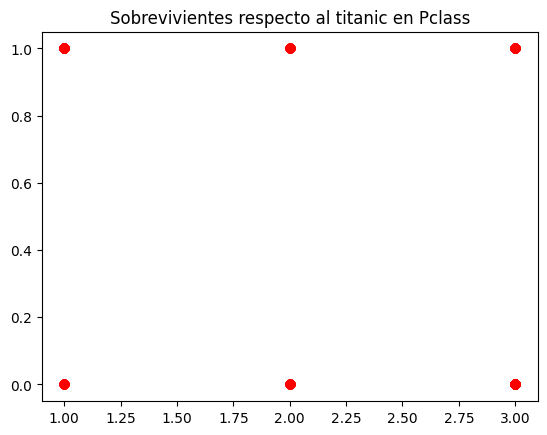

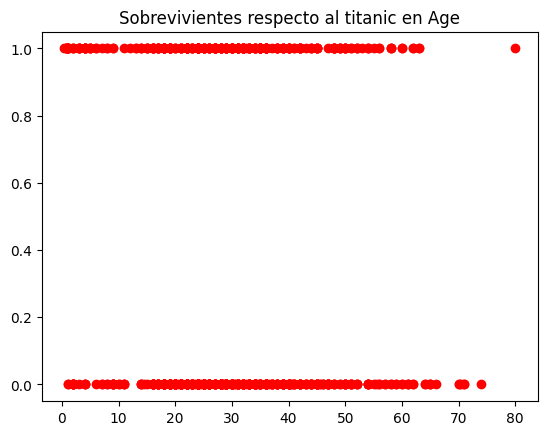

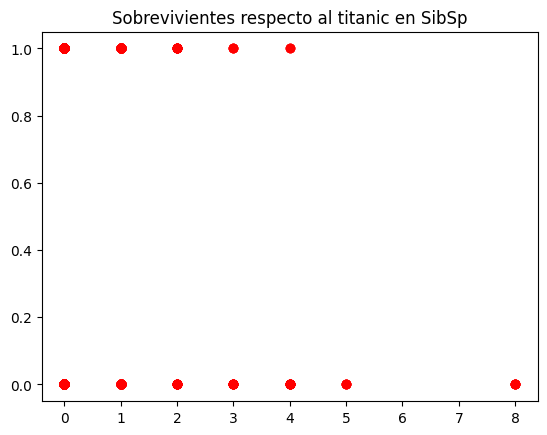

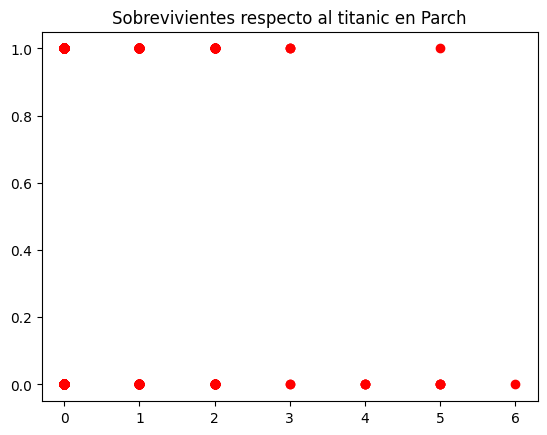

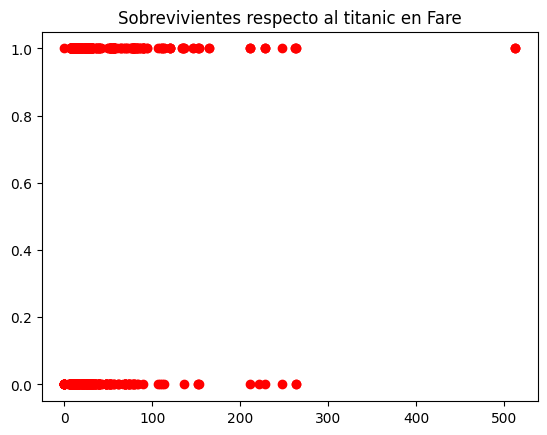

In [8]:
cols = ['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare',]

for col in cols:
  plt.plot(df_train[col], df_train['Survived'], 'ro')
  plt.title('Sobrevivientes respecto al titanic en %s' % col)
  plt.show()

Text(0.5, 1.0, 'Sobrevivencia')

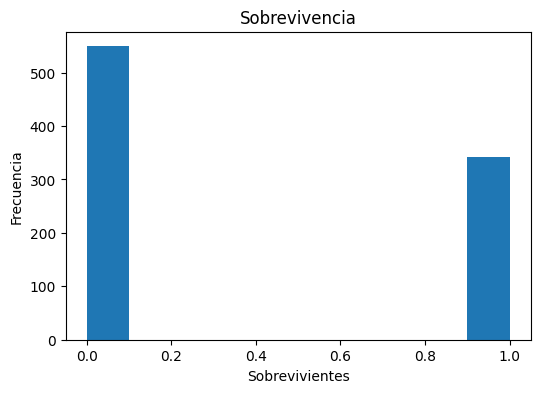

In [9]:
plt.figure(figsize=(6,4))
plt.hist(x=df_train["Survived"],bins=10)
plt.ticklabel_format(useOffset=False,style="plain")
plt.xlabel("Sobrevivientes")
plt.ylabel("Frecuencia")
plt.title("Sobrevivencia")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Sobrevivencia')

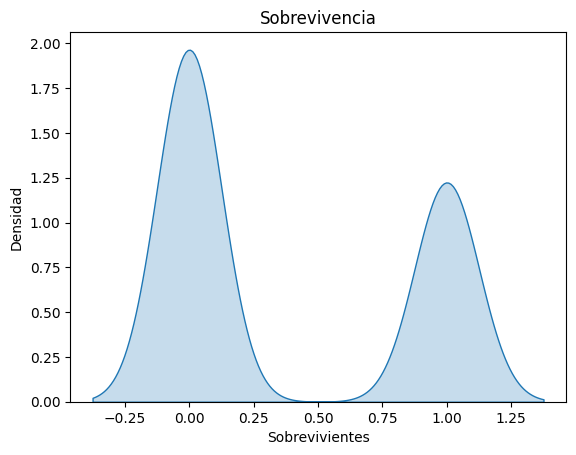

In [10]:
import seaborn as sb
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot
kdeplot(df_train["Survived"],fill=True)
plt.xlabel("Sobrevivientes")
plt.ylabel("Densidad")
plt.title("Sobrevivencia")

In [11]:
df_train.groupby("Survived").size().sort_values(ascending=False)

Survived
0    549
1    342
dtype: int64

In [12]:
df_train.groupby("Sex").size().sort_values(ascending=False)

Sex
male      577
female    314
dtype: int64

In [13]:
df_train.groupby("Age").size().sort_values(ascending=False)

Age
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Length: 88, dtype: int64

In [14]:
df_train.groupby("Cabin").size().sort_values(ascending=False)

Cabin
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Length: 147, dtype: int64

In [15]:
df_train.groupby("Embarked").size().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
dtype: int64

**##Creo variables para luego poder graficar**

In [16]:
labels_Sex = ['masculino', 'femenino'] 
# Supervivientes por sexo
male_survived = sum(df_train.loc[df_train['Sex']=='male'].Survived) # Suma la variable 'Supervivientes' para las filas que tienen 'Sexo'='masculino'
female_survived = sum(df_train.loc[df_train['Sex']=='female'].Survived) # Suma la variable 'Supervivientes' para las filas que tienen 'Sexo'='femenino'
Sex_survived = [male_survived, female_survived]
# Fallecidos por sexo
total_males = len(df_train.loc[df_train['Sex']=='male'].Survived) # Número de hombres a bordo
total_females = len(df_train.loc[df_train['Sex']=='female'].Survived) # Number de mujeres a bordo 
male_died = total_males - male_survived 
female_died = total_females - female_survived
Sex_died = [male_died, female_died]

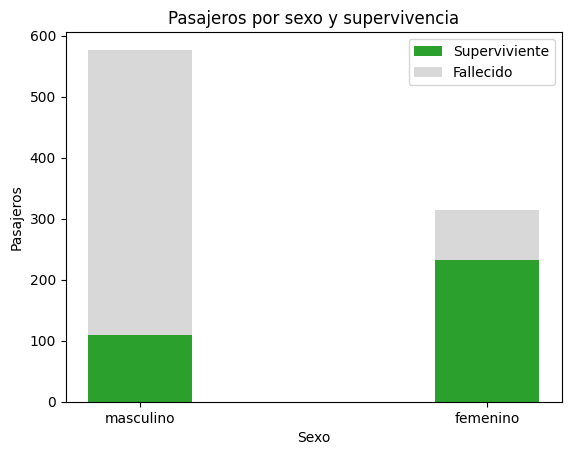

In [17]:
fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_Sex, Sex_survived, width, label='Superviviente',color='tab:green')
ax.bar(labels_Sex, Sex_died, width, bottom=Sex_survived,label='Fallecido',color='gray',alpha=0.3)
ax.set_xlabel('Sexo')
ax.set_ylabel('Pasajeros')
ax.set_title('Pasajeros por sexo y supervivencia')
ax.legend()
plt.show()

In [18]:
print('Proporción de pasajeros hombres que sobrevivieron:',round(male_survived*100/(male_survived+male_died),1),'%')
print('Proporción de pasajeras mujeres que sobrevivieron:',round(female_survived*100/(female_survived+female_died),1),'%')

Proporción de pasajeros hombres que sobrevivieron: 18.9 %
Proporción de pasajeras mujeres que sobrevivieron: 74.2 %


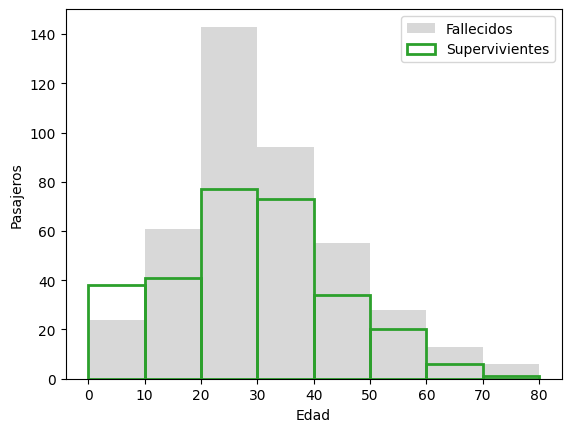

In [19]:
bins_age = [0,10,20,30,40,50,60,70,80]

fig, ax = plt.subplots(1, 1)
ax.hist(df_train.loc[df_train['Survived']==0].Age,bins=bins_age,color='gray',alpha=0.3,label='Fallecidos')
ax.hist(df_train.loc[df_train['Survived']==1].Age,bins=bins_age,facecolor='none',edgecolor='tab:green',linewidth=2,label='Supervivientes')
ax.set_xlabel('Edad')
ax.set_ylabel('Pasajeros')
ax.legend()
plt.show()

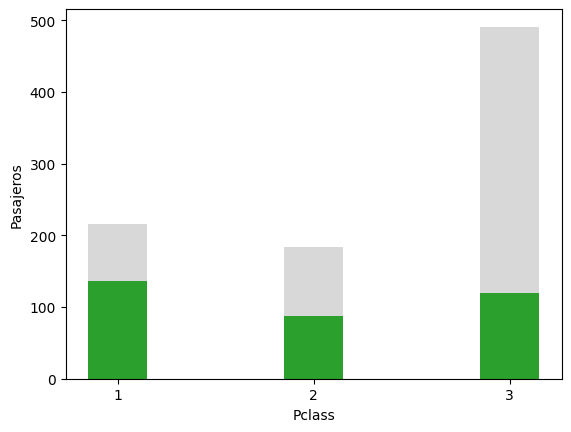

In [20]:
# Pasajeros por clase y supervivencia
labels_Pclass = ['1', '2', '3'] 
Pclass1_survived = sum(df_train.loc[df_train['Pclass']==1].Survived)
Pclass2_survived = sum(df_train.loc[df_train['Pclass']==2].Survived)
Pclass3_survived = sum(df_train.loc[df_train['Pclass']==3].Survived)
Pclass_survived = [Pclass1_survived, Pclass2_survived, Pclass3_survived]
Pclass1_died = len(df_train.loc[df_train['Pclass']==1].Survived)-Pclass1_survived
Pclass2_died = len(df_train.loc[df_train['Pclass']==2].Survived)-Pclass2_survived
Pclass3_died = len(df_train.loc[df_train['Pclass']==3].Survived)-Pclass3_survived
Pclass_died = [Pclass1_died, Pclass2_died, Pclass3_died]


# Gráfica
fig, (ax1) = plt.subplots(1,1)

# Clase
ax1.bar(labels_Pclass, Pclass_survived, width, label='Superviviente',color='tab:green')
ax1.bar(labels_Pclass, Pclass_died, width, bottom=Pclass_survived,label='Fallecido',color='gray',alpha=0.3)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Pasajeros')
plt.show()

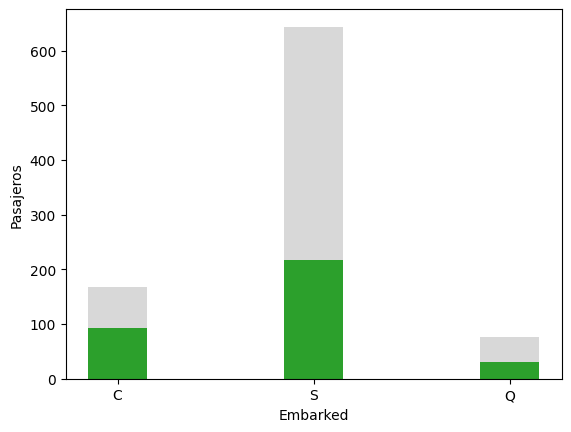

In [21]:
# Pasajeros por embarked y supervivencia
labels_Embarked = ['C', 'S', 'Q'] 
Embarked1_survived = sum(df_train.loc[df_train['Embarked']=='C'].Survived)
Embarked2_survived = sum(df_train.loc[df_train['Embarked']=='S'].Survived)
Embarked3_survived = sum(df_train.loc[df_train['Embarked']=='Q'].Survived)
Embarked_survived = [Embarked1_survived, Embarked2_survived, Embarked3_survived]
Embarked1_died = len(df_train.loc[df_train['Embarked']=='C'].Survived)-Embarked1_survived
Embarked2_died = len(df_train.loc[df_train['Embarked']=='S'].Survived)-Embarked2_survived
Embarked3_died = len(df_train.loc[df_train['Embarked']=='Q'].Survived)-Embarked3_survived
Embarked_died = [Embarked1_died, Embarked2_died, Embarked3_died]


# Gráfica
fig, (ax1) = plt.subplots(1,1)

# Clase
ax1.bar(labels_Embarked, Embarked_survived, width, label='Superviviente',color='tab:green')
ax1.bar(labels_Embarked, Embarked_died, width, bottom=Embarked_survived,label='Fallecido',color='gray',alpha=0.3)
ax1.set_xlabel('Embarked')
ax1.set_ylabel('Pasajeros')
plt.show()

Después de obtener información útil de nuestro análisis exploratorio, haremos una selección simple de características y eliminaremos las que no sean relevantes y que puedan reducir el desempeño de nuestro modelo de machine learning

In [22]:
df_train = df_train.drop(['Name','Ticket','Cabin'],axis=1)
df_test = df_test.drop(['Name','Ticket','Cabin'],axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
df_train.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [24]:
df_train.isnull().mean().sort_values(ascending=False)*100

Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Fare            0.000000
dtype: float64

In [25]:
df_train.duplicated().sum()

0

Deberia imputar valores(dado que elimine algunas columnas, me centrare en age que posee valores nulos)

In [26]:
# Paso 1: Calcular la mediana en df_train
mediana_edad = df_train['Age'].median()

# Paso 2: Imputar los valores faltantes en ambos conjuntos de datos
df_train['Age'] = df_train['Age'].fillna(mediana_edad)
df_test['Age'] = df_test['Age'].fillna(mediana_edad)

In [27]:
# Paso 1: Calcular la moda en df_train
moda_embarked = df_train['Embarked'].mode()[0]

# Paso 2: Imputar los valores faltantes en ambos conjuntos de datos
df_train['Embarked'] = df_train['Embarked'].fillna(moda_embarked)
df_test['Embarked'] = df_test['Embarked'].fillna(moda_embarked)

In [28]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [29]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [30]:
# Calcular la mediana de "Fare" en df_train
mediana_fare = df_train['Fare'].median()

# Imputar el valor faltante en df_test
df_test['Fare'] = df_test['Fare'].fillna(mediana_fare)

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [32]:
#TRANSFORMAR CATEGORICOS A NUMERICOS EN COLUMNA SEX
def encode_sex(df_train, df_test):
    """
    Convierte la columna 'Sex' a numérica, evitando la fuga de datos.
    """

    # 1. Definir el mapeo (solo una vez)
    sex_mapping = {'male': 0, 'female': 1}

    # 2. Aplicar el mapeo a df_train
    df_train['Sex'] = df_train['Sex'].map(sex_mapping)

    # 3. Aplicar el mismo mapeo a df_test
    df_test['Sex'] = df_test['Sex'].map(sex_mapping)

    return df_train, df_test

# Ejemplo de uso:
df_train, df_test = encode_sex(df_train, df_test)

In [33]:
#TRANSFORMAR CATEGORICOS A NUMERICOS EN COLUMNA EMBARKED

def one_hot_encode_embarked(df_train, df_test):
    """
    Realiza One-Hot Encoding en la columna 'Embarked', 
    evitando la fuga de datos.
    """

    # 1. Realizar One-Hot Encoding en df_train
    df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')

    # 2. Obtener las columnas creadas en df_train
    train_cols = df_train.columns

    # 3. Realizar One-Hot Encoding en df_test
    df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

    # 4. Asegurar que df_test tenga las mismas columnas que df_train
    for col in train_cols:
        if col not in df_test.columns:
            df_test[col] = 0

    # 5. Asegurar que df_train tenga las mismas columnas que df_test.
    test_cols = df_test.columns
    for col in test_cols:
        if col not in train_cols:
          df_train[col] = 0

    #6. Asegurar que los dataframes tengan el mismo orden en las columnas
    df_test = df_test[df_train.columns]

    return df_train, df_test

# Ejemplo de uso:
# Supongamos que tienes DataFrames llamados df_train y df_test
df_train, df_test = one_hot_encode_embarked(df_train, df_test)

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,False,True


In [35]:
#CREAR CLASE TAMAÑO DE FAMILIA CON SIBSP Y PARCH PARA DARLE MAS CONTEXTO AL MODELO
# Crear nuevas variables en df_train
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)

# Hacer lo mismo en df_test
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)

<Axes: >

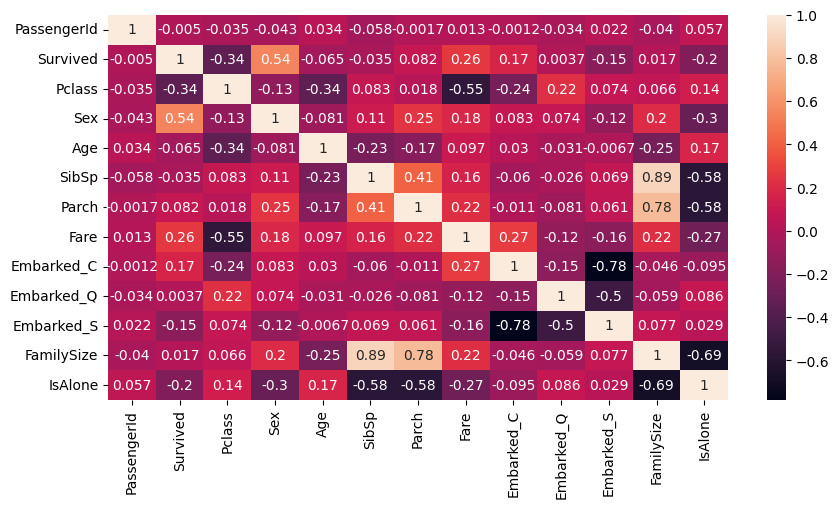

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), annot=True)

al parecer el valor del ticket(fare) era mas alto para quienes embarcaron en C que en otros puertos.

In [37]:
df_train = df_train.drop(['SibSp', 'Parch'], axis=1)
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)

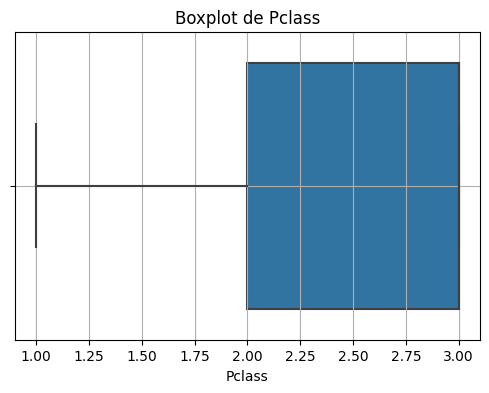

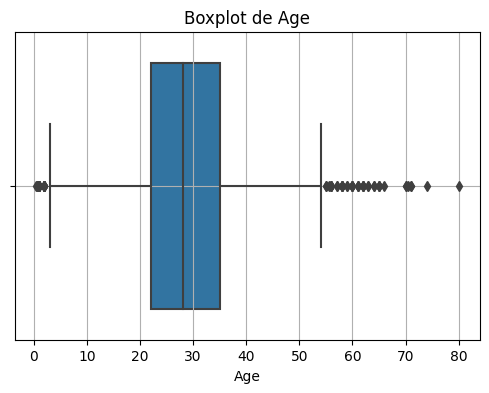

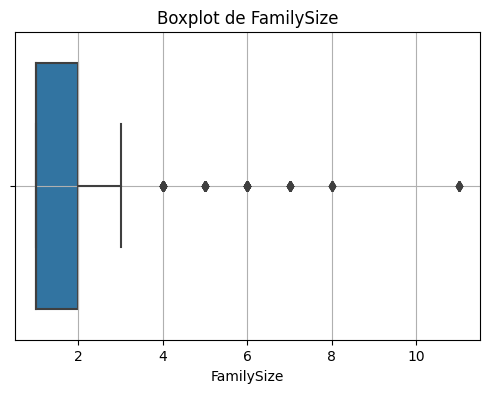

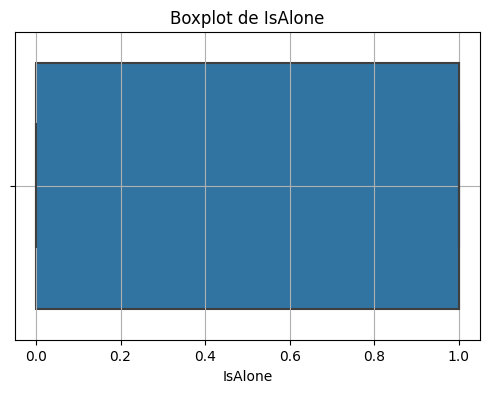

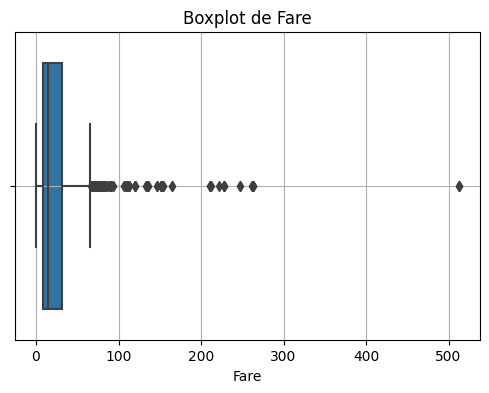

In [38]:
#REVISANDO OUTLIERS
# Lista de variables numéricas
numericas = ['Pclass', 'Age', 'FamilySize', 'IsAlone', 'Fare']

# Crear un boxplot por variable
for var in numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_train[var])
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)
    plt.grid(True)
    plt.show()


In [39]:
##ARBOL DE DECISION##
#Primero separamos nuestros datos en dos: uno para entrenamiento y uno para prueba
features = ['Pclass','Sex','Age','FamilySize','IsAlone','Fare','Embarked_C','Embarked_Q','Embarked_S']
X = df_train[features]

y=df_train['Survived']# Variable objetivo
y_names=['Died','Survived'] # Etiquetas de la variable objetivo

#Establecemos el tamaño de base de prueba en una proporción de 3 a 1.
#y ponemos estratificar en sí para que cada parte del conjunto de datos sea una representación del conjunto de datos en general
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)  

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state=10) #Elige la profundidad del árbol
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)

from sklearn import metrics
# Para obtener el accuracy del modelo
print("Accuracy en el set de prueba:",np.round(metrics.accuracy_score(y_test, y_pred),4))

# Obten la importancia de tus características
feature_importances_dict = {}
for i, name in enumerate(features): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Características por orden de importancia (reverse=True para orden descendente)  
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True)) 

# El método items() devuelve un tuple tipo (key,value) 
print('Características en orden de importancia:')   
for key in feature_importances_sorted:
    print(key)

Accuracy en el set de prueba: 0.838
Características en orden de importancia:
Sex
Pclass
Age
Fare
FamilySize
Embarked_S
IsAlone
Embarked_C
Embarked_Q


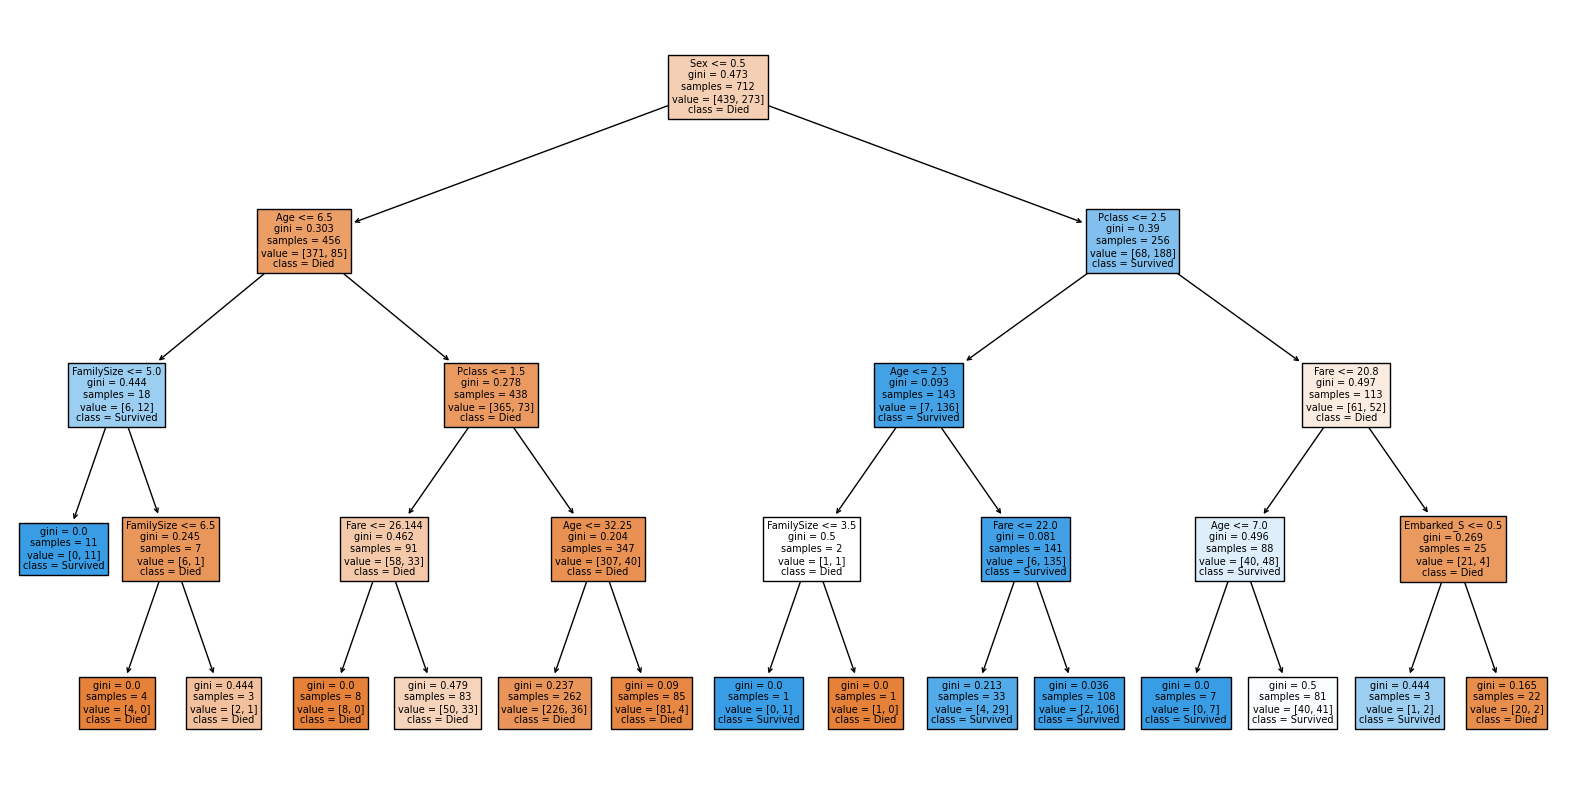

In [40]:
#VISUALIZACION DEL MODELO
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X.columns,class_names=y_names,filled=True)

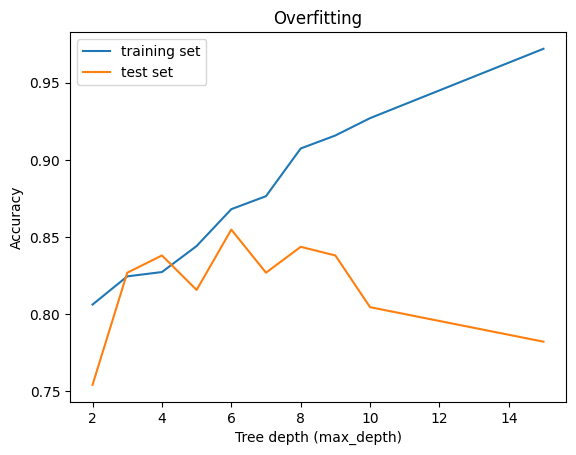

In [41]:
# Para ver como cambia el accuracy de nuestro modelo dependiento que tan profundo es nuestro arbol

max_depth_vals = [2,3,4,5,6,7,8,9,10,15]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    decision_tree.fit(X_train,y_train)
    # Training set
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)


fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test set')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()

In [42]:
# Asegúrate de que las predicciones y los datos de test estén bien alineados
print(f"Longitud de df_test: {len(df_test)}")
print(f"Longitud de X_test: {len(X_test)}")
print(f"Longitud de y_pred: {len(y_pred)}")


Longitud de df_test: 418
Longitud de X_test: 179
Longitud de y_pred: 179


In [43]:
print("Columnas en df_test:", df_test.columns.tolist())

missing_cols = [col for col in features if col not in df_test.columns]
if missing_cols:
    print("⚠️ Faltan las siguientes columnas en df_test:", missing_cols)
else:
    print("✅ Todas las columnas necesarias están presentes en df_test.")

if 'PassengerId' not in df_test.columns:
    print("⚠️ Falta la columna 'PassengerId' en df_test.")
else:
    print("✅ 'PassengerId' está presente.")


Columnas en df_test: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone']
✅ Todas las columnas necesarias están presentes en df_test.
✅ 'PassengerId' está presente.


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definir el modelo base
tree_model = DecisionTreeClassifier(random_state=10)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar el grid search con validación cruzada
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Entrenar el Grid Search
grid_search.fit(X_train, y_train)

# Ver mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo
mejor_arbol = grid_search.best_estimator_

# Predicción en el set de prueba
y_pred = mejor_arbol.predict(X_test)
print("Accuracy en el set de prueba con mejores parámetros:", round(accuracy_score(y_test, y_pred), 4))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Mejores hiperparámetros encontrados:
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy en el set de prueba con mejores parámetros: 0.8547


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model=RandomForestClassifier(random_state=10)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

print("Accuracy con RandomForest:",accuracy_score(y_test,y_pred))

Accuracy con RandomForest: 0.8268156424581006


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print("📊 Evaluación Árbol de Decisión (mejor_arbol):")
y_pred_arbol = mejor_arbol.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_arbol))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_arbol))

print("\n🌲 Evaluación Random Forest (rf_model):")
y_pred_rf = rf_model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

📊 Evaluación Árbol de Decisión (mejor_arbol):
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179

Matriz de confusión:
[[103   7]
 [ 19  50]]

🌲 Evaluación Random Forest (rf_model):
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

Matriz de confusión:
[[97 13]
 [18 51]]


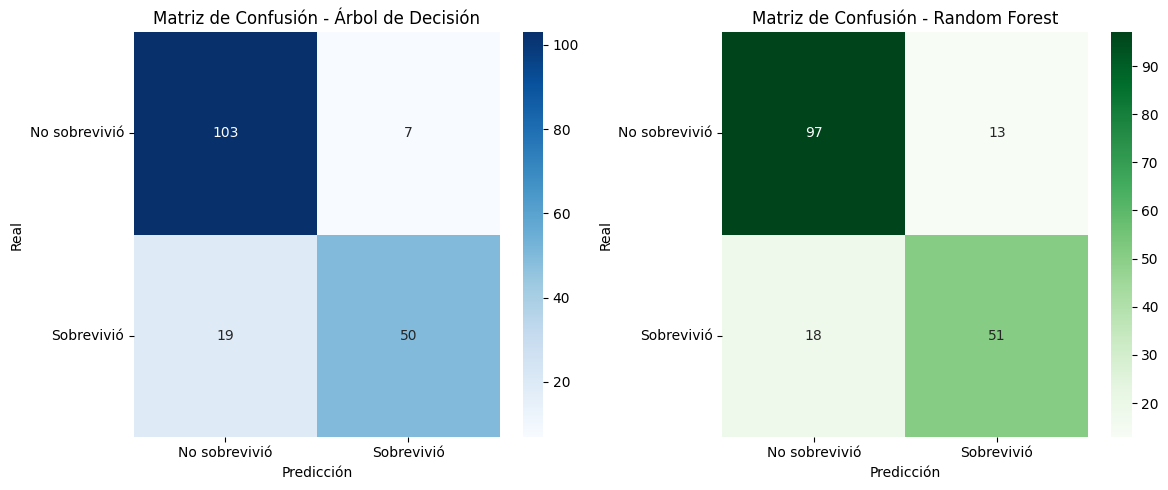

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asegúrate de tener los modelos entrenados:
# mejor_arbol (árbol optimizado) y rf_model (random forest)

# Generar predicciones
y_pred_arbol = mejor_arbol.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Crear matrices de confusión
conf_matrix_arbol = confusion_matrix(y_test, y_pred_arbol)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Dibujar los heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Árbol de Decisión
sns.heatmap(conf_matrix_arbol, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusión - Árbol de Decisión")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")
axes[0].set_xticklabels(['No sobrevivió', 'Sobrevivió'])
axes[0].set_yticklabels(['No sobrevivió', 'Sobrevivió'], rotation=0)

# Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matriz de Confusión - Random Forest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")
axes[1].set_xticklabels(['No sobrevivió', 'Sobrevivió'])
axes[1].set_yticklabels(['No sobrevivió', 'Sobrevivió'], rotation=0)

plt.tight_layout()
plt.show()


ARBOL DE DECISION
✅ 103 personas que murieron fueron clasificadas correctamente.

✅ 50 sobrevivientes también fueron clasificados correctamente.

❌ 7 personas fueron clasificadas como sobrevivientes pero murieron.

❌ 19 personas sobrevivieron, pero el modelo dijo que murieron.

🟢 En resumen: muy buen modelo, pero se le escapan algunos sobrevivientes.

RANDOM FOREST
✅ 97 muertos bien clasificados.

✅ 51 sobrevivientes bien clasificados.

❌ 13 errores donde el modelo dijo que alguien sobrevivió pero murió.

❌ 18 errores donde dijo que murieron pero sobrevivieron.

In [48]:
# Asegurarse de que las columnas coincidan
missing_cols = [col for col in features if col not in df_test.columns]
if missing_cols:
    raise ValueError(f"Faltan columnas en df_test: {missing_cols}")

# Predecir en el conjunto de Kaggle
y_pred_test = decision_tree.predict(df_test[features])

# Generar archivo para envío
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_pred_test
})

submission.to_csv("submission.csv", index=False)
print("✅ Archivo submission.csv generado correctamente para Kaggle.")

✅ Archivo submission.csv generado correctamente para Kaggle.
